In [3]:
using ReinforcementLearningCore, RLIntro, RLIntro.AccessControl

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1273


In [4]:
using Plots

In [6]:
env = AccessControlEnv()
nstates = length(get_observation_space(env))
nactions = length(get_action_space(env))
agent = Agent(
    policy=QBasedPolicy(
        learner=DifferentialTDLearner(
            approximator=TabularApproximator(n_state=nstates, n_action=nactions),
            α=0.01,
            β=0.01,
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
)

Agent{QBasedPolicy{DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}},EpsilonGreedyExplorer{:linear,Random.MersenneTwister}},EpisodicCompactSARTSATrajectory{Tuple{Int64,Int64,Float32,Bool,Int64,Int64},Tuple{Array{Float32,1},Array{Bool,1},Array{Int64,1},Array{Int64,1}}},ReinforcementLearningBase.DefaultPlayer}(QBasedPolicy{DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}},EpsilonGreedyExplorer{:linear,Random.MersenneTwister}}(DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}}(TabularApproximator{2,Array{Float64,2}}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), 0.01, 0.01, 0.0, 0), EpsilonGreedyExplorer{:linear,Random.MersenneTwister}(0.1, 1.0, 0, 0, 1, Random.MersenneTwister(UInt32[0x30f8a550, 0x4e1df903, 0x5ff33d2e, 0xf8588596], Random.DSFMT.DSFMT_state(Int32[794306081, 1072926680, 9956490, 1073602831, 654334450, 1073606506, -27536564, 1073740160, -1113781154, 1073663490  …  1420705269, 1073166537, -575280748, 1072752768, -1580697478, -204393519, 1552593

In [8]:
run(agent, env, StopAfterStep(2*10^6; is_show_progress=false))

EmptyHook()

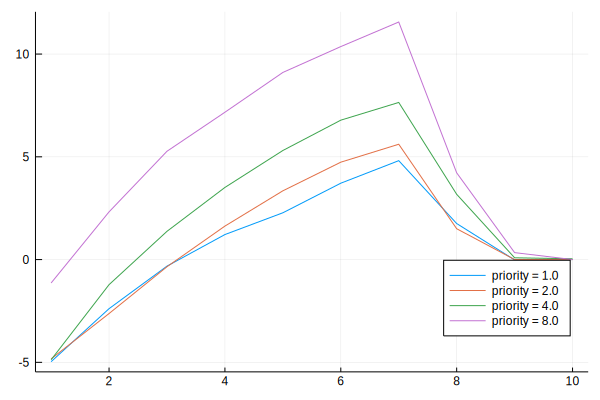

In [10]:
p = plot(legend=:bottomright)
for i in 1:length(AccessControl.PRIORITIES)
    plot!(
        [agent.policy.learner.approximator(AccessControl.TRANSFORMER[(CartesianIndex(n+1, i))]) |> maximum
            for n in 1:AccessControl.N_SERVERS],
        label="priority = $(AccessControl.PRIORITIES[i])")
end
p